# Machine Learing Project:Car Price pridiction
by Pasupunuri Bharath Kumar

+ DATA PREPARATION

In [1]:
import pandas as pd
cars_train=pd.read_excel("Data_Train.xlsx")
cars_train.head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814 CC,55.2 bhp,5.0,2.35
6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,3.50
7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8.0,17.50
8,Volkswagen Vento Diesel Comfortline,Pune,2013,64430,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,5.20
9,Tata Indica Vista Quadrajet LS,Chennai,2012,65932,Diesel,Manual,Second,22.3 kmpl,1248 CC,74 bhp,5.0,1.95


In [2]:
cars_test=pd.read_excel("Data_Test.xlsx")
cars_test.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0


Removal of special Characters from Column values

In [3]:
BrandName=[]
ModelName=[]
SeriesName=[]
for n,m in cars_train.iterrows():
    BrandName.append(m["Name"].split()[0])
    ModelName.append(m["Name"].split()[1])
    SeriesName.append(m["Name"].split()[2:])

In [4]:
cars_train["Brand"]=BrandName
cars_train["Model"]=ModelName
cars_train["Series"]=SeriesName
cars_train.head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model,Series
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,Maruti,Wagon,"[R, LXI, CNG]"
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,Hyundai,Creta,"[1.6, CRDi, SX, Option]"
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,Honda,Jazz,[V]
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,Maruti,Ertiga,[VDI]
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,Audi,A4,"[New, 2.0, TDI, Multitronic]"
5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814 CC,55.2 bhp,5.0,2.35,Hyundai,EON,"[LPG, Era, Plus, Option]"
6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,3.50,Nissan,Micra,"[Diesel, XV]"
7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8.0,17.50,Toyota,Innova,"[Crysta, 2.8, GX, AT, 8S]"
8,Volkswagen Vento Diesel Comfortline,Pune,2013,64430,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,5.20,Volkswagen,Vento,"[Diesel, Comfortline]"
9,Tata Indica Vista Quadrajet LS,Chennai,2012,65932,Diesel,Manual,Second,22.3 kmpl,1248 CC,74 bhp,5.0,1.95,Tata,Indica,"[Vista, Quadrajet, LS]"


In [5]:
#test data 
BrandName1=[]
ModelName1=[]
SeriesName1=[]
for n,m in cars_test.iterrows():
    BrandName1.append(m["Name"].split()[0])
    ModelName1.append(m["Name"].split()[1])
    SeriesName1.append(m["Name"].split()[2:])
cars_test["Brand"]=BrandName1
cars_test["Model"]=ModelName1
cars_test["Series"]=SeriesName1
cars_test.head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand,Model,Series
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,Maruti,Alto,"[K10, LXI, CNG]"
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,Maruti,Alto,"[800, 2016-2019, LXI]"
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,Toyota,Innova,"[Crysta, Touring, Sport, 2.4, MT]"
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,Toyota,Etios,"[Liva, GD]"
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,Hyundai,i20,[Magna]
5,Mahindra XUV500 W8 2WD,Coimbatore,2016,85609,Diesel,Manual,Second,16.0 kmpl,2179 CC,140 bhp,7.0,Mahindra,XUV500,"[W8, 2WD]"
6,Toyota Fortuner 4x2 AT TRD Sportivo,Pune,2015,59000,Diesel,Automatic,First,12.55 kmpl,2982 CC,168.7 bhp,7.0,Toyota,Fortuner,"[4x2, AT, TRD, Sportivo]"
7,Hyundai EON Era Plus,Jaipur,2013,65000,Petrol,Manual,First,21.1 kmpl,814 CC,55.2 bhp,5.0,Hyundai,EON,"[Era, Plus]"
8,Honda City 1.5 S MT,Mumbai,2011,66000,Petrol,Manual,Second,17.0 kmpl,1497 CC,118 bhp,5.0,Honda,City,"[1.5, S, MT]"
9,Mahindra XUV500 W6 2WD,Coimbatore,2015,54684,Diesel,Manual,First,15.1 kmpl,2179 CC,140 bhp,7.0,Mahindra,XUV500,"[W6, 2WD]"


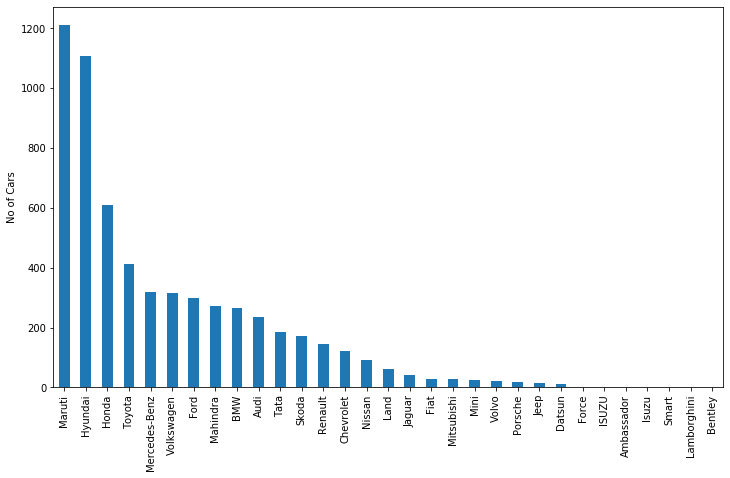

In [6]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12, 7))
p=cars_train.Brand.value_counts()
p.plot(kind="bar")
plt.ylabel("No of Cars")
plt.show()

Maruthi and Hyundai Brands has more no.of Cars

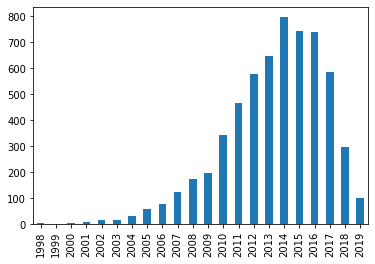

In [7]:


cars_train.Year.value_counts().sort_index().plot(kind="bar")

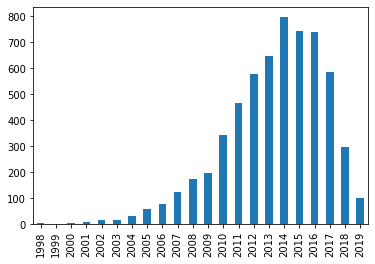

In [8]:
cars_train.Year.value_counts().sort_index().plot(kind="bar")

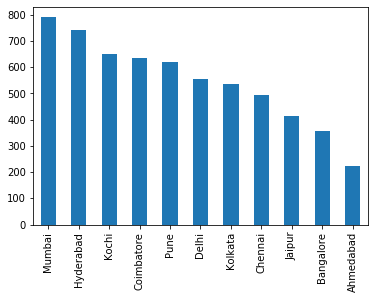

In [9]:
cars_train.Location.value_counts().plot(kind="bar")

+ DATA CLEANING

In [10]:
for i in cars_train.columns:
    if len(cars_train[cars_train[i].isnull()].index)>0:
       print(i,"Null value counts :",len(cars_train[cars_train[i].isnull()].index))

Mileage Null value counts : 2
Engine Null value counts : 36
Power Null value counts : 36
Seats Null value counts : 42


In [11]:
for i in cars_test.columns:
    if len(cars_test[cars_test[i].isnull()].index)>0:
       print(i,"Null value counts :",len(cars_test[cars_test[i].isnull()].index))

Engine Null value counts : 10
Power Null value counts : 10
Seats Null value counts : 11


In [12]:
cars_train[cars_train.Seats.isnull()].head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model,Series
194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN,2.95,Honda,City,"[1.5, GXI]"
208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN,2.11,Maruti,Swift,"[1.3, VXi]"
229,Ford Figo Diesel,Bangalore,2015,70436,Diesel,Manual,First,0.0 kmpl,1498 CC,99 bhp,NaN,3.60,Ford,Figo,[Diesel]
733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.1 kmpl,NaN,NaN,NaN,1.75,Maruti,Swift,"[1.3, VXi]"
749,Land Rover Range Rover 3.0 D,Mumbai,2008,55001,Diesel,Automatic,Second,0.0 kmpl,NaN,NaN,NaN,26.50,Land,Rover,"[Range, Rover, 3.0, D]"


{'whiskers': [<matplotlib.lines.Line2D at 0x281fdfbb408>,
 'caps': [<matplotlib.lines.Line2D at 0x281fef9cd88>,
 'boxes': [<matplotlib.lines.Line2D at 0x281fd272888>],
 'medians': [<matplotlib.lines.Line2D at 0x281fefa4d08>],
 'fliers': [<matplotlib.lines.Line2D at 0x281fefa4e08>],
 'means': []}

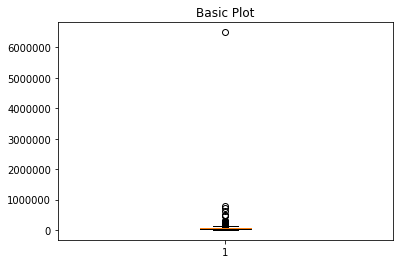

In [13]:
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot(cars_train.Kilometers_Driven)


Balancing Outliers

In [14]:
cars_train[cars_train.Kilometers_Driven>=1000000].head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model,Series
2328,BMW X5 xDrive 30d M Sport,Chennai,2017,6500000,Diesel,Automatic,First,15.97 kmpl,2993 CC,258 bhp,5.0,65.0,BMW,X5,"[xDrive, 30d, M, Sport]"


In [15]:
cars_test[cars_test.Kilometers_Driven>=1000000].head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand,Model,Series


In [16]:
d=cars_train[cars_train.Kilometers_Driven<=1000000].Kilometers_Driven.mean()
cars_train.Kilometers_Driven.loc[cars_train.Kilometers_Driven>=1000000]=d

C:\Newfolder\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [17]:
cars_train.Kilometers_Driven.describe()

count      6019.000000
mean      57668.047690
std       37875.635921
min         171.000000
25%       34000.000000
50%       53000.000000
75%       73000.000000
max      775000.000000
Name: Kilometers_Driven, dtype: float64

In [18]:
Mileage_Mod=[]
Engine_Mod=[]
Power_Mod=[]
for i,j in cars_train.iterrows():
    try:
        Mileage_Mod.append(j["Mileage"].split()[0])
    except:
        Mileage_Mod.append(0)
    try:
        Engine_Mod.append(j["Engine"].split()[0])
    except:
        Engine_Mod.append(0)
    try:
        if j["Power"].split()[0]=="null":
            Power_Mod.append(0)
        else:
            Power_Mod.append(j["Power"].split()[0])
    except:
        Power_Mod.append(0)

cars_train["Engine_mod"]=Engine_Mod
cars_train["Power_mod"]=Power_Mod
cars_train["Mileage_mod"]=Mileage_Mod
cars_train["Mileage_mod"]=cars_train.Mileage_mod.astype(float)
cars_train["Engine_mod"]=cars_train.Engine_mod.astype(float)
cars_train["Power_mod"]=cars_train.Power_mod.astype(float)
cars_train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model,Series,Engine_mod,Power_mod,Mileage_mod
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000.0,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,Maruti,Wagon,"[R, LXI, CNG]",998.0,58.16,26.60
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000.0,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,Hyundai,Creta,"[1.6, CRDi, SX, Option]",1582.0,126.20,19.67
2,Honda Jazz V,Chennai,2011,46000.0,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,Honda,Jazz,[V],1199.0,88.70,18.20
3,Maruti Ertiga VDI,Chennai,2012,87000.0,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,Maruti,Ertiga,[VDI],1248.0,88.76,20.77
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670.0,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,Audi,A4,"[New, 2.0, TDI, Multitronic]",1968.0,140.80,15.20


In [19]:
Engine_Mod=[]
Power_Mod=[]
for i,j in cars_test.iterrows():
    try:
        Engine_Mod.append(j["Engine"].split()[0])
    except:
        Engine_Mod.append(0)
    try:
        if j["Power"].split()[0]=="null":
            Power_Mod.append(0)
        else:
            Power_Mod.append(j["Power"].split()[0])
    except:
        Power_Mod.append(0)
cars_test["Engine_mod"]=Engine_Mod
cars_test["Power_mod"]=Power_Mod
cars_test["Mileage_mod"]=cars_train.Mileage_mod.astype(float)
cars_test["Engine_mod"]=cars_train.Engine_mod.astype(float)
cars_test["Power_mod"]=cars_train.Power_mod.astype(float)
cars_test.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand,Model,Series,Engine_mod,Power_mod,Mileage_mod
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,Maruti,Alto,"[K10, LXI, CNG]",998.0,58.16,26.60
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,Maruti,Alto,"[800, 2016-2019, LXI]",1582.0,126.20,19.67
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,Toyota,Innova,"[Crysta, Touring, Sport, 2.4, MT]",1199.0,88.70,18.20
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,Toyota,Etios,"[Liva, GD]",1248.0,88.76,20.77
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,Hyundai,i20,[Magna],1968.0,140.80,15.20


In [20]:
cars_train.groupby("Transmission").Engine_mod.mean()

Transmission
Automatic    2086.759884
Manual       1421.463131
Name: Engine_mod, dtype: float64

In [21]:
cars_train.Fuel_Type.value_counts()

Diesel      3205
Petrol      2746
CNG           56
LPG           10
Electric       2
Name: Fuel_Type, dtype: int64

Filling up missing Engine values

In [22]:
PM=cars_train[(cars_train.Fuel_Type=="Petrol") & (cars_train.Transmission=="Manual")].Engine_mod.mean()
DM=cars_train[(cars_train.Fuel_Type=="Diesel") & (cars_train.Transmission=="Manual")].Engine_mod.mean()
PA=cars_train[(cars_train.Fuel_Type=="Petrol") & (cars_train.Transmission=="Automatic")].Engine_mod.mean()
DA=cars_train[(cars_train.Fuel_Type=="Diesel") & (cars_train.Transmission=="Automatic")].Engine_mod.mean()

In [23]:
cars_train.Engine_mod.loc[(cars_train.Fuel_Type=="Petrol") & (cars_train.Transmission=="Manual") & (cars_train.Engine_mod==0)]=PM
cars_train.Engine_mod.loc[(cars_train.Fuel_Type=="Diesel") & (cars_train.Transmission=="Manual") & (cars_train.Engine_mod==0)]=DM
cars_train.Engine_mod.loc[(cars_train.Fuel_Type=="Petrol") & (cars_train.Transmission=="Automatic") & (cars_train.Engine_mod==0)]=PA
cars_train.Engine_mod.loc[(cars_train.Fuel_Type=="Diesel") & (cars_train.Transmission=="Automatic") & (cars_train.Engine_mod==0)]=DA

C:\Newfolder\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [24]:
cars_train.Engine_mod.describe()

count    6019.000000
mean     1620.273483
std       600.566802
min        72.000000
25%      1198.000000
50%      1493.000000
75%      1984.000000
max      5998.000000
Name: Engine_mod, dtype: float64

In [25]:
PM=cars_test[(cars_test.Fuel_Type=="Petrol") & (cars_test.Transmission=="Manual")].Engine_mod.mean()
DM=cars_test[(cars_test.Fuel_Type=="Diesel") & (cars_test.Transmission=="Manual")].Engine_mod.mean()
PA=cars_test[(cars_test.Fuel_Type=="Petrol") & (cars_test.Transmission=="Automatic")].Engine_mod.mean()
DA=cars_test[(cars_test.Fuel_Type=="Diesel") & (cars_test.Transmission=="Automatic")].Engine_mod.mean()

In [26]:
cars_test.Engine_mod.loc[(cars_test.Fuel_Type=="Petrol") & (cars_test.Transmission=="Manual") & (cars_test.Engine_mod==0)]=PM
cars_test.Engine_mod.loc[(cars_test.Fuel_Type=="Diesel") & (cars_test.Transmission=="Manual") & (cars_test.Engine_mod==0)]=DM
cars_test.Engine_mod.loc[(cars_test.Fuel_Type=="Petrol") & (cars_test.Transmission=="Automatic") & (cars_test.Engine_mod==0)]=PA
cars_test.Engine_mod.loc[(cars_test.Fuel_Type=="Diesel") & (cars_test.Transmission=="Automatic") & (cars_test.Engine_mod==0)]=DA

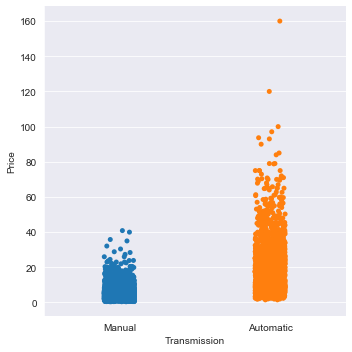

In [27]:
import seaborn as sns
sns.set_style('darkgrid')
sns.catplot(x="Transmission",y="Price",data=cars_train)

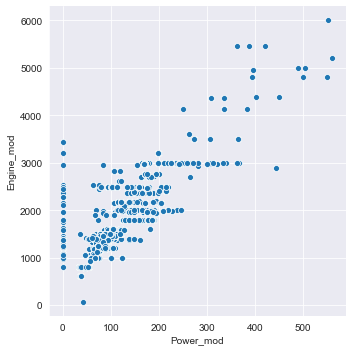

In [28]:
sns.relplot(x="Power_mod", y="Engine_mod", data=cars_train);

Filling up missing values of Power

In [29]:
power_mis=[]
for i,j in cars_train[cars_train.Power_mod==0].iterrows():
    power_mis.append(cars_train[cars_train.Engine_mod.between(j.Engine_mod-250,j.Engine_mod+250)].Power_mod.mean())

In [30]:
k=0
for i in cars_train[cars_train["Power_mod"]==0].Power_mod.index.tolist():
    cars_train.Power_mod.iloc[i]=power_mis[k]
    k+=1

C:\Newfolder\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


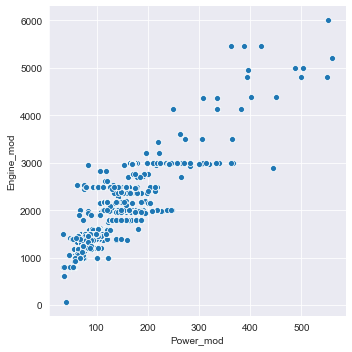

In [31]:
sns.relplot(x="Power_mod", y="Engine_mod", data=cars_train);

In [32]:
power_mis=[]
for i,j in cars_test[cars_test.Power_mod==0].iterrows():
    power_mis.append(cars_test[cars_test.Engine_mod.between(j.Engine_mod-250,j.Engine_mod+250)].Power_mod.mean())
k=0
for i in cars_test[cars_test["Power_mod"]==0].Power_mod.index.tolist():
    cars_test.Power_mod.iloc[i]=power_mis[k]
    k+=1

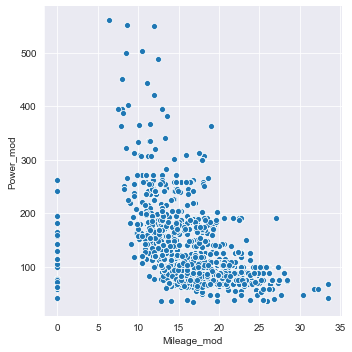

In [33]:
sns.relplot(x="Mileage_mod", y="Power_mod", data=cars_train);

Filling up missing values of Mileage

In [34]:
Mileage_mis=[]
for i,j in cars_train[cars_train.Mileage_mod==0].iterrows():
    Mileage_mis.append(cars_train[cars_train.Power_mod.between(j.Power_mod-25,j.Engine_mod+25)].Mileage_mod.mean())
k=0
for i in cars_train[cars_train["Mileage_mod"]==0].Mileage_mod.index.tolist():
    cars_train.Mileage_mod.iloc[i]=Mileage_mis[k]
    k+=1

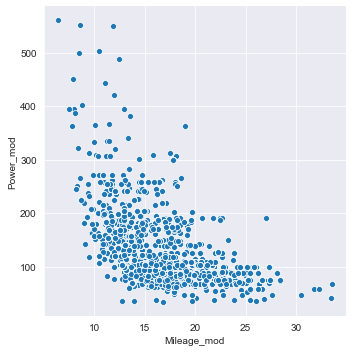

In [35]:
sns.relplot(x="Mileage_mod", y="Power_mod", data=cars_train);

In [36]:
Mileage_mis=[]
for i,j in cars_test[cars_test.Mileage_mod==0].iterrows():
    Mileage_mis.append(cars_test[cars_test.Power_mod.between(j.Power_mod-25,j.Engine_mod+25)].Mileage_mod.mean())
k=0
for i in cars_test[cars_test["Mileage_mod"]==0].Mileage_mod.index.tolist():
    cars_test.Mileage_mod.iloc[i]=Mileage_mis[k]
    k+=1

Filling up missing values of Seats

In [37]:
seats_mis=[]
for i,j in cars_train[(cars_train.Seats==0) | (cars_train.Seats.isnull())].iterrows():
    seats_mis.append(round(cars_train[cars_train.Brand==j.Brand].Seats.mean()))
k=0
for i in cars_train[(cars_train["Seats"].isnull()) | (cars_train.Seats==0)].Seats.index.tolist():
    cars_train.Seats.iloc[i]=seats_mis[k]
    k+=1

In [38]:
cars_train.Seats.describe()

count    6019.000000
mean        5.277953
std         0.803778
min         2.000000
25%         5.000000
50%         5.000000
75%         5.000000
max        10.000000
Name: Seats, dtype: float64

In [39]:
seats_mis=[]
for i,j in cars_test[(cars_test.Seats==0) | (cars_test.Seats.isnull())].iterrows():
    seats_mis.append(round(cars_test[cars_test.Brand==j.Brand].Seats.mean()))
k=0
for i in cars_test[(cars_test["Seats"].isnull()) | (cars_test.Seats==0)].Seats.index.tolist():
    cars_test.Seats.iloc[i]=seats_mis[k]
    k+=1

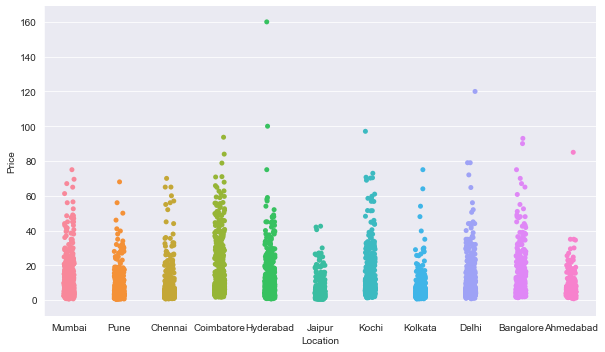

In [40]:

sns.catplot(x="Location",y="Price",data=cars_train,aspect=1.7)

In [41]:
cars_train_Cleaned=cars_train.drop(["Name","Mileage","Engine","Power"],axis=1)

In [42]:
cars_train_Cleaned.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Brand,Model,Series,Engine_mod,Power_mod,Mileage_mod
0,Mumbai,2010,72000.0,CNG,Manual,First,5.0,1.75,Maruti,Wagon,"[R, LXI, CNG]",998.0,58.16,26.60
1,Pune,2015,41000.0,Diesel,Manual,First,5.0,12.50,Hyundai,Creta,"[1.6, CRDi, SX, Option]",1582.0,126.20,19.67
2,Chennai,2011,46000.0,Petrol,Manual,First,5.0,4.50,Honda,Jazz,[V],1199.0,88.70,18.20
3,Chennai,2012,87000.0,Diesel,Manual,First,7.0,6.00,Maruti,Ertiga,[VDI],1248.0,88.76,20.77
4,Coimbatore,2013,40670.0,Diesel,Automatic,Second,5.0,17.74,Audi,A4,"[New, 2.0, TDI, Multitronic]",1968.0,140.80,15.20


In [43]:
cars_test_Cleaned=cars_test.drop(["Name","Mileage","Engine","Power"],axis=1)

In [44]:
for i,j in cars_train_Cleaned.iterrows():
    cars_train_Cleaned.Year.iloc[i]=2019-j.Year

C:\Newfolder\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [45]:
for i,j in cars_test_Cleaned.iterrows():
    cars_test_Cleaned.Year.iloc[i]=2019-j.Year

In [46]:
cars_train_Cleaned.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Brand,Model,Series,Engine_mod,Power_mod,Mileage_mod
0,Mumbai,9,72000.0,CNG,Manual,First,5.0,1.75,Maruti,Wagon,"[R, LXI, CNG]",998.0,58.16,26.60
1,Pune,4,41000.0,Diesel,Manual,First,5.0,12.50,Hyundai,Creta,"[1.6, CRDi, SX, Option]",1582.0,126.20,19.67
2,Chennai,8,46000.0,Petrol,Manual,First,5.0,4.50,Honda,Jazz,[V],1199.0,88.70,18.20
3,Chennai,7,87000.0,Diesel,Manual,First,7.0,6.00,Maruti,Ertiga,[VDI],1248.0,88.76,20.77
4,Coimbatore,6,40670.0,Diesel,Automatic,Second,5.0,17.74,Audi,A4,"[New, 2.0, TDI, Multitronic]",1968.0,140.80,15.20


In [47]:
cars_test_Cleaned.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Brand,Model,Series,Engine_mod,Power_mod,Mileage_mod
0,Delhi,5,40929,CNG,Manual,First,4.0,Maruti,Alto,"[K10, LXI, CNG]",998.0,58.16,26.60
1,Coimbatore,6,54493,Petrol,Manual,Second,5.0,Maruti,Alto,"[800, 2016-2019, LXI]",1582.0,126.20,19.67
2,Mumbai,2,34000,Diesel,Manual,First,7.0,Toyota,Innova,"[Crysta, Touring, Sport, 2.4, MT]",1199.0,88.70,18.20
3,Hyderabad,7,139000,Diesel,Manual,First,5.0,Toyota,Etios,"[Liva, GD]",1248.0,88.76,20.77
4,Mumbai,5,29000,Petrol,Manual,First,5.0,Hyundai,i20,[Magna],1968.0,140.80,15.20


Normalizing

In [48]:
from sklearn.preprocessing import MinMaxScaler
for i in ["Kilometers_Driven","Mileage_mod","Engine_mod","Power_mod"]:
    cars_train_Cleaned[i] = MinMaxScaler(feature_range=(0,1)).fit_transform(cars_train_Cleaned[i].values.astype(float).reshape(-1,1))
    

In [49]:
from sklearn.preprocessing import MinMaxScaler
for i in ["Kilometers_Driven","Mileage_mod","Engine_mod","Power_mod"]:
    cars_test_Cleaned[i] = MinMaxScaler(feature_range=(0,1)).fit_transform(cars_test_Cleaned[i].values.astype(float).reshape(-1,1))
    

In [50]:
cars_train_Cleaned.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Brand,Model,Series,Engine_mod,Power_mod,Mileage_mod
0,Mumbai,9,0.092703,CNG,Manual,First,5.0,1.75,Maruti,Wagon,"[R, LXI, CNG]",0.156261,0.045569,0.744289
1,Pune,4,0.052694,Diesel,Manual,First,5.0,12.50,Hyundai,Creta,"[1.6, CRDi, SX, Option]",0.254809,0.174971,0.488946
2,Chennai,8,0.059147,Petrol,Manual,First,5.0,4.50,Honda,Jazz,[V],0.190179,0.103652,0.434783
3,Chennai,7,0.112062,Diesel,Manual,First,7.0,6.00,Maruti,Ertiga,[VDI],0.198448,0.103766,0.529477
4,Coimbatore,6,0.052268,Diesel,Automatic,Second,5.0,17.74,Audi,A4,"[New, 2.0, TDI, Multitronic]",0.319946,0.202739,0.324245


In [51]:
    cars_test_Cleaned.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Brand,Model,Series,Engine_mod,Power_mod,Mileage_mod
0,Delhi,5,0.114410,CNG,Manual,First,4.0,Maruti,Alto,"[K10, LXI, CNG]",0.077321,0.051438,0.912579
1,Coimbatore,6,0.153275,Petrol,Manual,Second,5.0,Maruti,Alto,"[800, 2016-2019, LXI]",0.198057,0.197510,0.576008
2,Mumbai,2,0.094556,Diesel,Manual,First,7.0,Toyota,Innova,"[Crysta, Touring, Sport, 2.4, MT]",0.118875,0.117003,0.504614
3,Hyderabad,7,0.395415,Diesel,Manual,First,5.0,Toyota,Etios,"[Liva, GD]",0.129006,0.117132,0.629432
4,Mumbai,5,0.080229,Petrol,Manual,First,5.0,Hyundai,i20,[Magna],0.277858,0.228854,0.358912


Observed Features

In [52]:
cars_train_Cleaned["Below_2000"]=cars_train_Cleaned.Year.apply(lambda x : 1 if x>19 else 0 )
cars_train_Cleaned["2000-2005"]=cars_train_Cleaned.Year.apply(lambda x : 1 if (x>14 & x<19) else 0 )
cars_train_Cleaned["2005-2010"]=cars_train_Cleaned.Year.apply(lambda x : 1 if (x>9 & x<14) else 0 )
cars_train_Cleaned["2010-2015"]=cars_train_Cleaned.Year.apply(lambda x : 1 if (x>5 & x<9) else 0 )
cars_train_Cleaned["2015-2019"]=cars_train_Cleaned.Year.apply(lambda x : 1 if (x<5 & x>=0) else 0 )

In [53]:
cars_test_Cleaned["Below_2000"]=cars_train_Cleaned.Year.apply(lambda x : 1 if x>19 else 0 )
cars_test_Cleaned["2000-2005"]=cars_train_Cleaned.Year.apply(lambda x : 1 if (x>14 & x<19) else 0 )
cars_test_Cleaned["2005-2010"]=cars_train_Cleaned.Year.apply(lambda x : 1 if (x>9 & x<14) else 0 )
cars_test_Cleaned["2010-2015"]=cars_train_Cleaned.Year.apply(lambda x : 1 if (x>5 & x<9) else 0 )
cars_test_Cleaned["2015-2019"]=cars_train_Cleaned.Year.apply(lambda x : 1 if (x<5 & x>=0) else 0 )

In [54]:
from sklearn import preprocessing
Laenc=preprocessing.LabelEncoder()


In [86]:
Laenc.fit(cars_train_Cleaned["Brand"])
cars_train_Cleaned["Brand_Tras"]=Laenc.transform(cars_train_Cleaned["Brand"])

In [56]:
Laenc.fit(cars_test_Cleaned["Brand"])
cars_test_Cleaned["Brand_Tras"]=Laenc.transform(cars_test_Cleaned["Brand"])

In [57]:
Laenc.fit(cars_train_Cleaned["Model"])
cars_train_Cleaned["Model_Trans"]=Laenc.transform(cars_train_Cleaned["Model"])

In [58]:
Laenc.fit(cars_test_Cleaned["Model"])
cars_test_Cleaned["Model_Trans"]=Laenc.transform(cars_test_Cleaned["Model"])

In [59]:
Laenc.fit(cars_train_Cleaned["Location"])
cars_train_Cleaned["Location_Trans"]=Laenc.transform(cars_train_Cleaned["Location"])

In [60]:
Laenc.fit(cars_test_Cleaned["Location"])
cars_test_Cleaned["Location_Trans"]=Laenc.transform(cars_test_Cleaned["Location"])

In [61]:
Automatic=[]
for n,m in cars_train_Cleaned.iterrows():
    Automatic.append(1 if ((m["Transmission"]=="Automatic") & (m["Price"]>45)) else 0)
cars_train_Cleaned["Is_AUtomatic_HighCost"]=Automatic

In [62]:
Automatic=[]
for n,m in cars_test_Cleaned.iterrows():
    Automatic.append(1 if (m["Transmission"]=="Automatic") else 0)
cars_test_Cleaned["Is_AUtomatic_HighCost"]=Automatic

In [63]:
for i in ["Year","Brand_Tras","Model_Trans","Location_Trans"]:
    cars_train_Cleaned[i] = MinMaxScaler(feature_range=(0,1)).fit_transform(cars_train_Cleaned[i].values.astype(float).reshape(-1,1))
    

In [64]:
cars_train_Cleaned.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Brand,Model,...,Mileage_mod,Below_2000,2000-2005,2005-2010,2010-2015,2015-2019,Brand_Tras,Model_Trans,Location_Trans,Is_AUtomatic_HighCost
0,Mumbai,0.428571,0.092703,CNG,Manual,First,5.0,1.75,Maruti,Wagon,...,0.744289,0,1,0,1,0,0.600000,0.895735,0.9,0
1,Pune,0.190476,0.052694,Diesel,Manual,First,5.0,12.50,Hyundai,Creta,...,0.488946,0,0,1,0,0,0.333333,0.251185,1.0,0
2,Chennai,0.380952,0.059147,Petrol,Manual,First,5.0,4.50,Honda,Jazz,...,0.434783,0,0,0,1,0,0.300000,0.469194,0.2,0
3,Chennai,0.333333,0.112062,Diesel,Manual,First,7.0,6.00,Maruti,Ertiga,...,0.529477,0,1,1,1,0,0.600000,0.327014,0.2,0
4,Coimbatore,0.285714,0.052268,Diesel,Automatic,Second,5.0,17.74,Audi,A4,...,0.324245,0,0,1,1,0,0.033333,0.047393,0.3,0


In [65]:
for i in ["Year","Brand_Tras","Model_Trans","Location_Trans"]:
    cars_test_Cleaned[i] = MinMaxScaler(feature_range=(0,1)).fit_transform(cars_test_Cleaned[i].values.astype(float).reshape(-1,1))
    

In [66]:
data_train_final=cars_train_Cleaned.copy()

In [67]:
data_train_final=data_train_final.drop(["Location","Fuel_Type","Transmission","Owner_Type","Seats","Brand","Model","Series"],axis=1)

In [68]:
data_test_final=cars_test_Cleaned.copy()

In [69]:
data_test_final=data_test_final.drop(["Location","Fuel_Type","Transmission","Owner_Type","Seats","Brand","Model","Series"],axis=1)
data_test_final.head()

,Year,Kilometers_Driven,Engine_mod,Power_mod,Mileage_mod,Below_2000,2000-2005,2005-2010,2010-2015,2015-2019,Brand_Tras,Model_Trans,Location_Trans,Is_AUtomatic_HighCost
0,0.217391,0.114410,0.077321,0.051438,0.912579,0,1,0,1,0,0.571429,0.10000,0.4,0
1,0.260870,0.153275,0.198057,0.197510,0.576008,0,0,1,0,0,0.571429,0.10000,0.3,0
2,0.086957,0.094556,0.118875,0.117003,0.504614,0,0,0,1,0,0.928571,0.48750,0.9,0
3,0.304348,0.395415,0.129006,0.117132,0.629432,0,1,1,1,0,0.928571,0.37500,0.5,0
4,0.217391,0.080229,0.277858,0.228854,0.358912,0,0,1,1,0,0.321429,0.99375,0.9,0


In [70]:
data_train_final=data_train_final[["Year","Brand_Tras","Location_Trans","Kilometers_Driven","Engine_mod","Power_mod","Mileage_mod","Below_2000","2000-2005","2010-2015","2015-2019","Is_AUtomatic_HighCost","Price"]]

In [71]:
data_test_final=data_test_final[["Year","Brand_Tras","Location_Trans","Kilometers_Driven","Engine_mod","Power_mod","Mileage_mod","Below_2000","2000-2005","2010-2015","2015-2019","Is_AUtomatic_HighCost"]]

In [72]:
data_train_final.head()

,Year,Brand_Tras,Location_Trans,Kilometers_Driven,Engine_mod,Power_mod,Mileage_mod,Below_2000,2000-2005,2010-2015,2015-2019,Is_AUtomatic_HighCost,Price
0,0.428571,0.600000,0.9,0.092703,0.156261,0.045569,0.744289,0,1,1,0,0,1.75
1,0.190476,0.333333,1.0,0.052694,0.254809,0.174971,0.488946,0,0,0,0,0,12.50
2,0.380952,0.300000,0.2,0.059147,0.190179,0.103652,0.434783,0,0,1,0,0,4.50
3,0.333333,0.600000,0.2,0.112062,0.198448,0.103766,0.529477,0,1,1,0,0,6.00
4,0.285714,0.033333,0.3,0.052268,0.319946,0.202739,0.324245,0,0,1,0,0,17.74


In [73]:
data_test_final.head()

,Year,Brand_Tras,Location_Trans,Kilometers_Driven,Engine_mod,Power_mod,Mileage_mod,Below_2000,2000-2005,2010-2015,2015-2019,Is_AUtomatic_HighCost
0,0.217391,0.571429,0.4,0.114410,0.077321,0.051438,0.912579,0,1,1,0,0
1,0.260870,0.571429,0.3,0.153275,0.198057,0.197510,0.576008,0,0,0,0,0
2,0.086957,0.928571,0.9,0.094556,0.118875,0.117003,0.504614,0,0,1,0,0
3,0.304348,0.928571,0.5,0.395415,0.129006,0.117132,0.629432,0,1,1,0,0
4,0.217391,0.321429,0.9,0.080229,0.277858,0.228854,0.358912,0,0,1,0,0


+ DATA SPLITING

Linear Regression

In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import math
x_train, x_test, y_train, y_test = train_test_split(data_train_final.loc[:, data_train_final.columns != 'Price'], data_train_final[['Price']],
                                                    test_size=0.3,
                                                    random_state=0)


In [75]:
 b=LinearRegression()
b.fit(x_train,y_train)
y_pred=b.predict(x_test)

rmse=math.sqrt(mean_squared_error(y_test,y_pred))

print(rmse)
r2_score(y_test,y_pred)

5.023087300363252


0.7991066091088483

Lasso Regression

In [76]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Lasso
k=[0.0001,0.001,0.1,1,10,100]
pram=dict(alpha=k)
las=RandomizedSearchCV(Lasso(),pram,random_state=1,cv=4,verbose=0,scoring="neg_mean_squared_error")
best_Mod=las.fit(x_train,y_train)

C:\Newfolder\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


In [77]:
y_pred=las.predict(x_test)

rmse=math.sqrt(mean_squared_error(y_test,y_pred))

print(rmse)
r2_score(y_test,y_pred)


5.023434453959702


0.799078840022256

Random Forest Regression

In [78]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
parameters=dict(n_estimators=[1,2,4,8,16,32,64,100])
Ran=RandomizedSearchCV(RandomForestRegressor(),parameters,random_state=1,cv=4,verbose=0,scoring="neg_mean_squared_error")


In [79]:
Ran.fit(x_train,y_train)

C:\Newfolder\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
C:\Newfolder\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Newfolder\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Newfolder\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape o

C:\Newfolder\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Newfolder\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Newfolder\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Newfolder\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

RandomizedSearchCV(cv=4, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [80]:
y_pred=Ran.predict(x_test)

rmse=math.sqrt(mean_squared_error(y_test,y_pred))

print(rmse)
r2_score(y_test,y_pred)

3.3750078460118362


0.9093069994748902

Out of all Regression outcomes r2_score is maximum and rmse is minimum in Randomforest Regresssion model,Therefore Data  prediction is done by Randomforest Regresssion

+ Test Data prediction

In [81]:
y_test_Pred=Ran.predict(data_test_final)

In [82]:
data_test_final["Price"]=y_test_Pred

In [83]:
data_test_final.head()

,Year,Brand_Tras,Location_Trans,Kilometers_Driven,Engine_mod,Power_mod,Mileage_mod,Below_2000,2000-2005,2010-2015,2015-2019,Is_AUtomatic_HighCost,Price
0,0.217391,0.571429,0.4,0.114410,0.077321,0.051438,0.912579,0,1,1,0,0,3.072656
1,0.260870,0.571429,0.3,0.153275,0.198057,0.197510,0.576008,0,0,0,0,0,12.355781
2,0.086957,0.928571,0.9,0.094556,0.118875,0.117003,0.504614,0,0,1,0,0,5.902656
3,0.304348,0.928571,0.5,0.395415,0.129006,0.117132,0.629432,0,1,1,0,0,3.895000
4,0.217391,0.321429,0.9,0.080229,0.277858,0.228854,0.358912,0,0,1,0,0,8.955156


In [84]:
CAR_DATA_TEST=pd.read_excel("Data_test.xlsx")
CAR_DATA_TEST["Price"]=y_test_Pred

In [85]:
CAR_DATA_TEST.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,3.072656
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,12.355781
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,5.902656
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,3.895000
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,8.955156
